<a href="https://colab.research.google.com/github/AbidYousuf/Abid-Yousuf/blob/main/HandlingMissingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/data_science_job.csv')

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [ ]:
df.shape

(19158, 13)

In [ ]:
cols = [col for col in df.columns if df[col].isnull().mean() < 0.05 and df[col].isnull().mean() > 0]

In [ ]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].sample(3)

,city_development_index,enrolled_university,education_level,experience,training_hours
7286,0.920,no_enrollment,Graduate,20.0,326.0
101,0.878,no_enrollment,Masters,20.0,150.0
9953,0.624,no_enrollment,Graduate,14.0,224.0


In [ ]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [ ]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [ ]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

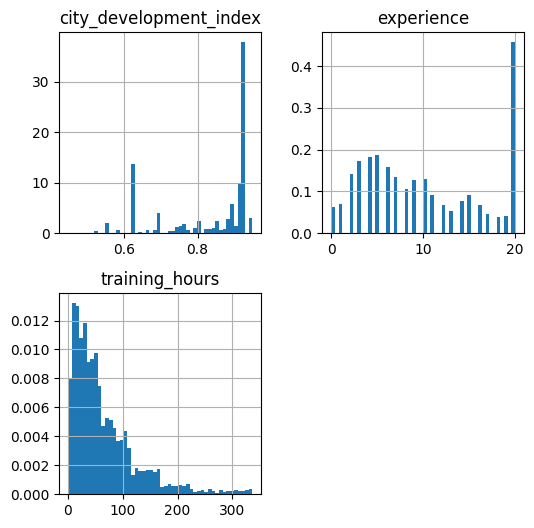

In [ ]:
new_df.hist(bins=50, density=True, figsize=(6, 6))
plt.show()

<Axes: >

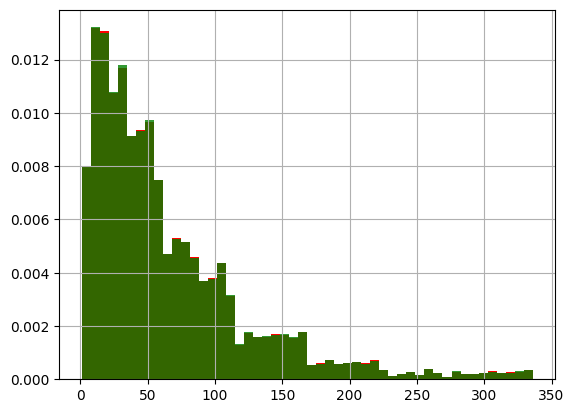

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

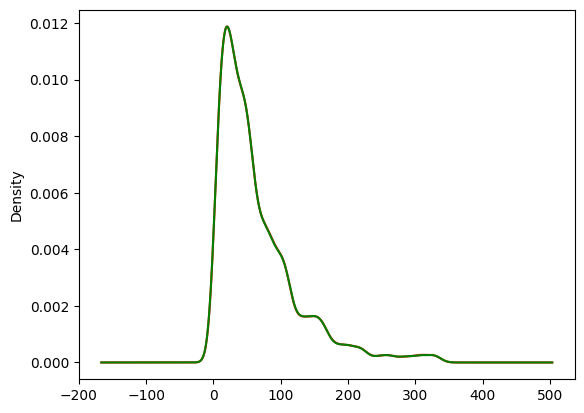

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

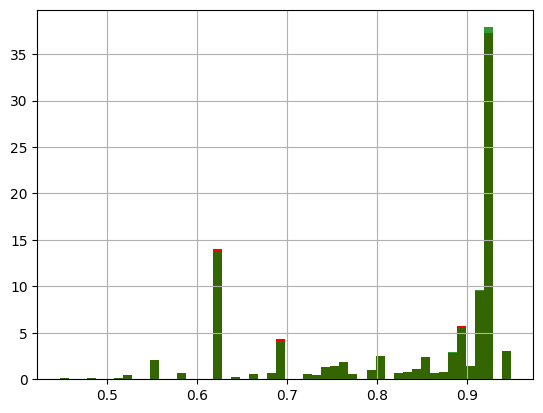

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

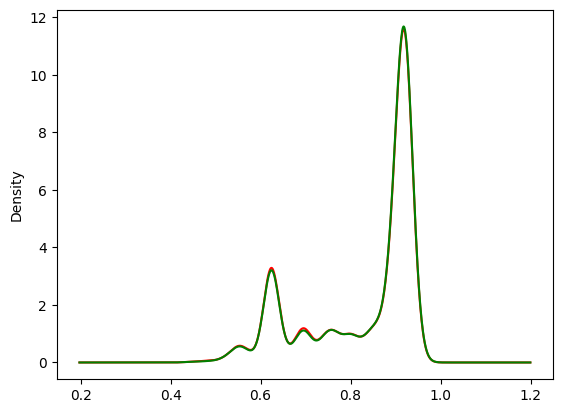

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<Axes: >

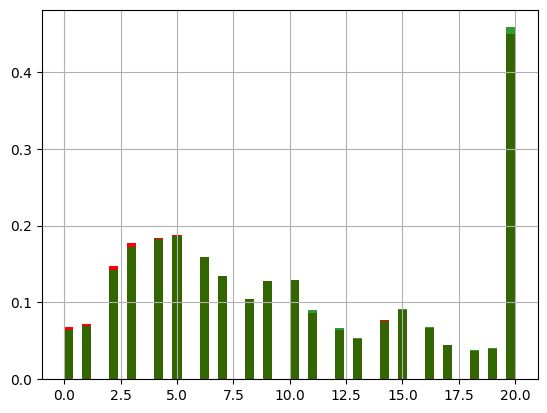

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

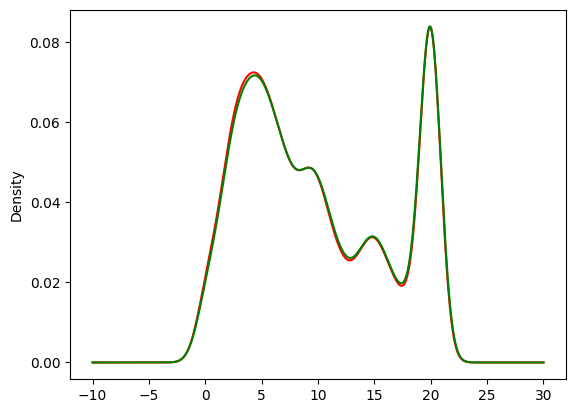

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [ ]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


**Handling missing numeric data**

**1.Mean/Median imputation**

In [ ]:
df = pd.read_csv('/content/titanic_toy.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [ ]:
X = df.iloc[:,0:3]
y= df.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [ ]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [ ]:
X_train.isnull().mean()

Age       0.189607
Fare      0.054775
Family    0.000000
dtype: float64

In [ ]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [ ]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_age)
X_train['Fare_median'] = X_train['Fare'].fillna(median_age)

In [ ]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
152,55.5,8.050,0,55.500000,55.5,8.050,8.050
297,2.0,151.550,3,2.000000,2.0,151.550,151.550
648,NaN,7.550,0,29.467799,28.0,7.550,7.550
186,NaN,15.500,1,29.467799,28.0,15.500,15.500
788,1.0,20.575,3,1.000000,1.0,20.575,20.575


In [ ]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  213.23096129284613
Age Variance after median imputation:  173.07557724047473
Age Variance after mean imputation:  172.74406990812852
Original Fare variable variance:  2569.825367890604
Fare Variance after median imputation:  2430.0557600411785
Fare Variance after mean imputation:  2429.437890817858


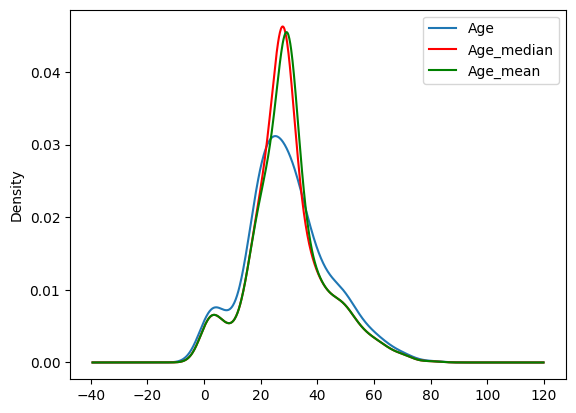

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

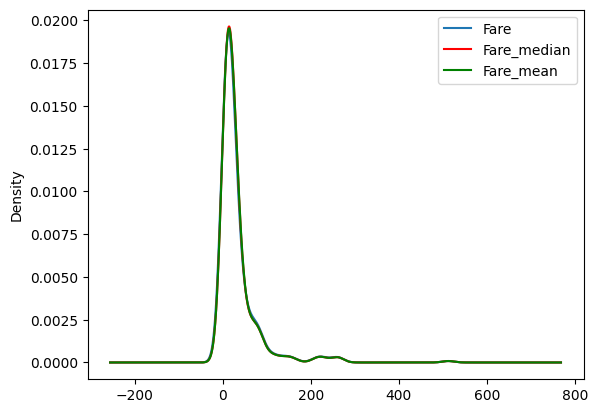

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,213.230961,71.600169,-6.922363,213.230961,213.230961,66.978853,66.907178
Fare,71.600169,2569.825368,18.396282,57.549639,60.173218,2569.825368,2569.825368
Family,-6.922363,18.396282,2.706947,-5.607990,-5.568299,17.395409,17.399030
Age_mean,213.230961,57.549639,-5.607990,172.744070,172.744070,54.261349,54.203283
Age_median,213.230961,60.173218,-5.568299,172.744070,173.075577,56.717713,56.649361
Fare_mean,66.978853,2569.825368,17.395409,54.261349,56.717713,2429.437891,2429.690974
Fare_median,66.907178,2569.825368,17.399030,54.203283,56.649361,2429.690974,2430.055760


In [ ]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.090860,-0.315592,1.000000,1.000000,0.088128,0.088017
Fare,0.090860,1.000000,0.217369,0.086200,0.090048,1.000000,1.000000
Family,-0.315592,0.217369,1.000000,-0.259338,-0.257256,0.214507,0.214525
Age_mean,1.000000,0.086200,-0.259338,1.000000,0.999042,0.083760,0.083660
Age_median,1.000000,0.090048,-0.257256,0.999042,1.000000,0.087468,0.087351
Fare_mean,0.088128,1.000000,0.214507,0.083760,0.087468,1.000000,0.999977
Fare_median,0.088017,1.000000,0.214525,0.083660,0.087351,0.999977,1.000000


<Axes: >

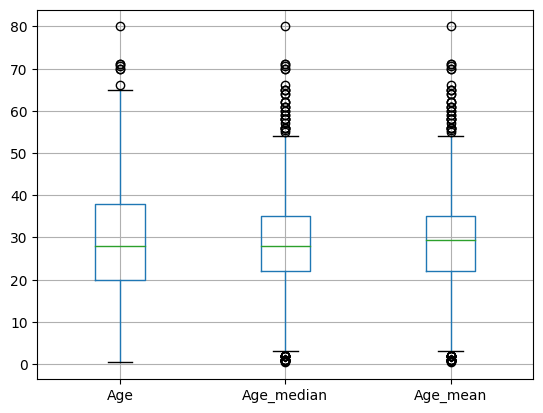

In [ ]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

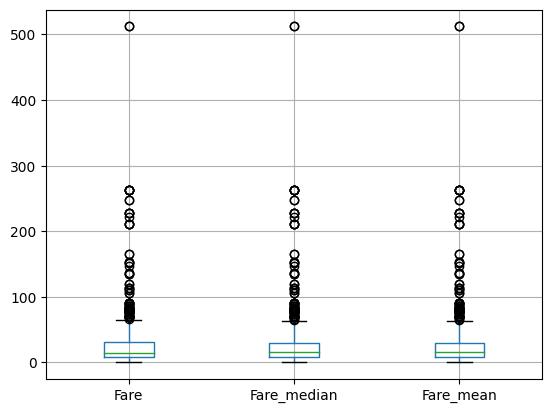

In [ ]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

**Using Sklearn**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [ ]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [ ]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

**2.Arbitrary value imputation**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [ ]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 wala imputation:  47219.202652176304
Fare Variance after -1 wala imputation:  2378.5676784883494


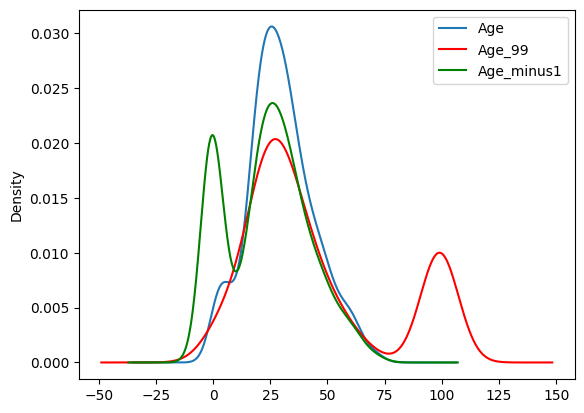

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

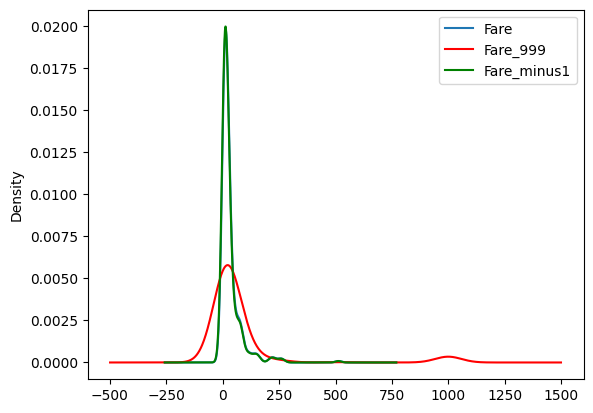

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [ ]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


**Using Sklearn**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
trf = ColumnTransformer([
    ('imputer1',SimpleImputer(strategy='constant',fill_value=99),['Age']),
    ('imputer2',SimpleImputer(strategy='constant',fill_value=999),['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

**Handling Categorical Missing Data**

**1.Most Frequent value imputation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train1.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
df.isnull().mean()*100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

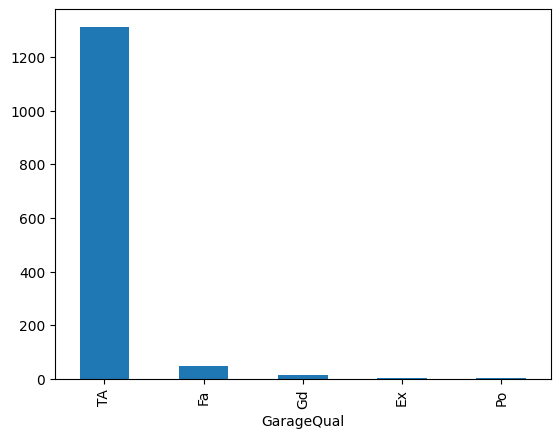

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

In [ ]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

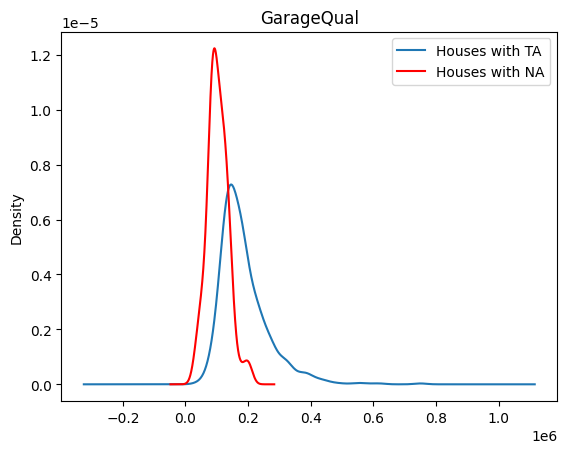

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [ ]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [ ]:
df['GarageQual'].fillna('TA', inplace=True)

<Axes: xlabel='GarageQual'>

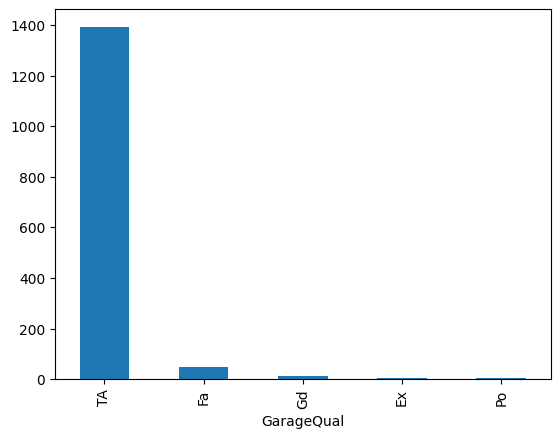

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'GarageQual')

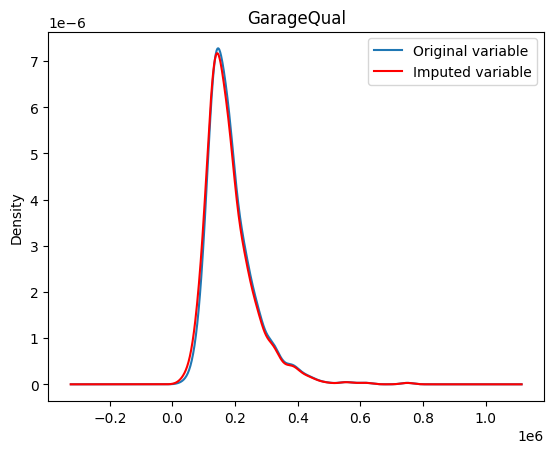

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')


<Axes: xlabel='FireplaceQu'>

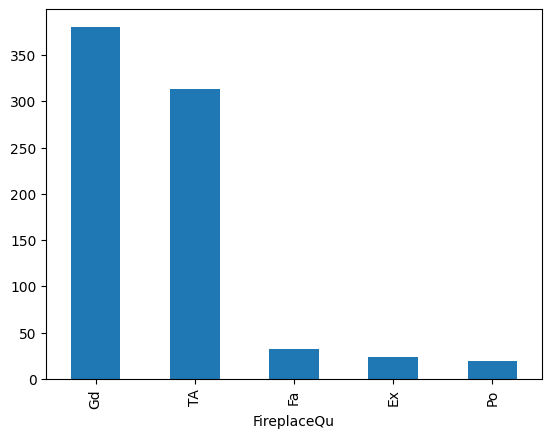

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [ ]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

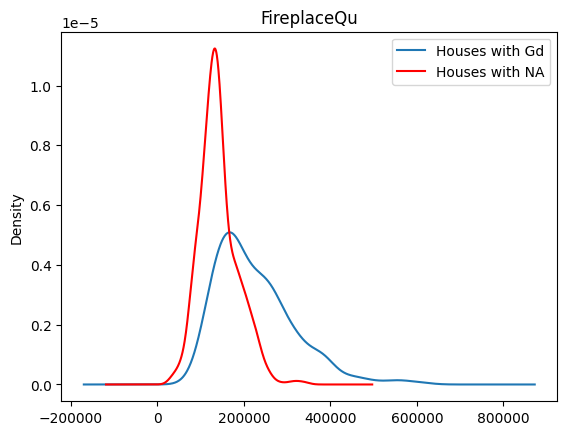

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [ ]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [ ]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<Axes: xlabel='FireplaceQu'>

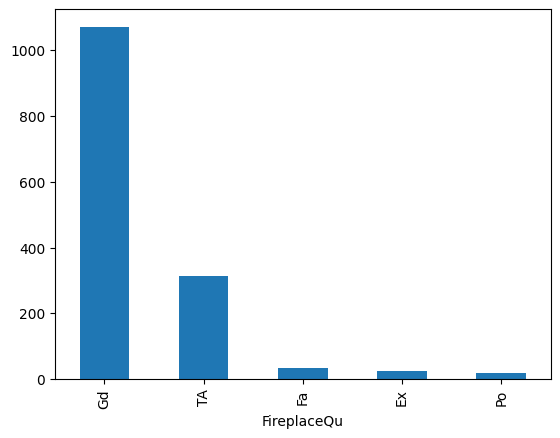

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

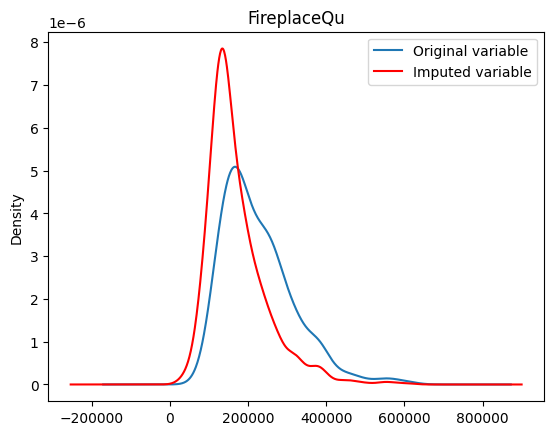

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

**2.Missing Category Imputation**

In [ ]:
df = pd.read_csv('/content/train1.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

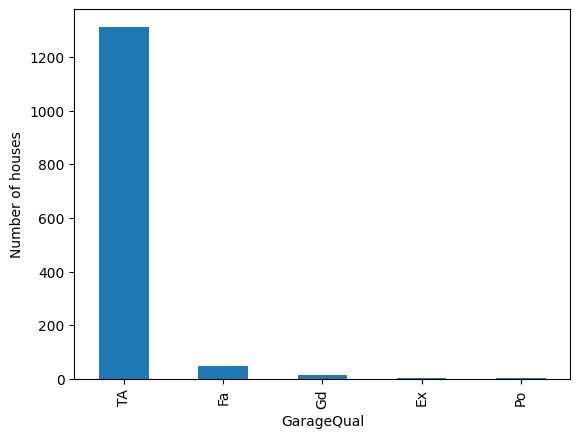

In [ ]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [ ]:
df['GarageQual'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

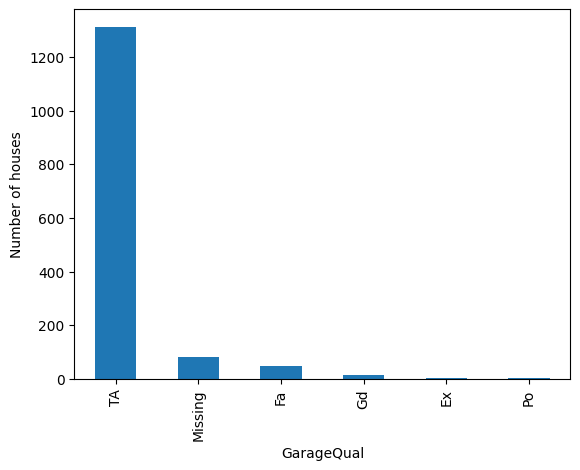

In [ ]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [ ]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

# **Random Sample Imputation**

**1.Numerical data**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [ ]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [ ]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [ ]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [ ]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [ ]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([24.  , 18.  , 30.  , 29.  , 43.  , 22.  , 36.  ,  7.  , 29.  ,
       47.  , 39.  , 36.  , 36.  ,  9.  , 22.  , 33.  , 35.  , 31.  ,
       60.  , 37.  , 43.  , 23.  , 36.  , 18.  , 22.  , 36.  , 44.  ,
       51.  , 45.  , 47.  , 21.  , 16.  , 48.  , 26.  , 28.  ,  0.42,
       25.  , 50.  , 40.  , 42.  , 28.  , 66.  ,  8.  , 41.  , 17.  ,
       62.  , 31.  , 16.  , 47.  , 33.  , 28.  ,  4.  , 34.  , 26.  ,
       30.  , 45.  , 25.  , 27.  , 35.  , 16.  , 56.  , 21.  , 35.  ,
       18.  , 21.  , 21.  , 28.  , 19.  , 47.  , 52.  , 27.  , 58.  ,
       20.  , 43.  , 15.  , 39.  , 24.  , 29.  , 57.  , 22.  , 30.  ,
       25.  , 50.  , 38.  , 54.  , 33.  , 16.  , 39.  , 26.  , 30.  ,
       20.  , 17.  , 18.  , 56.  , 47.  , 20.  , 18.  , 38.  ,  3.  ,
        2.  , 34.  , 49.  , 34.  , 25.  , 40.  , 32.  , 18.  , 60.  ,
       62.  , 38.  , 45.  , 24.  , 19.  , 28.  , 31.  , 22.  , 51.  ,
       11.  , 27.  , 36.  , 11.  , 24.  , 36.  , 41.  , 44.  , 34.  ,
       30.  , 26.  ,

In [ ]:
X_train['Age'].isnull().sum()

148

In [ ]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,21.0
493,71.0,49.5042,71.0
527,NaN,221.7792,19.0


<ipython-input-377-a4e9b458bbaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
<ipython-input-377-a4e9b458bbaf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)


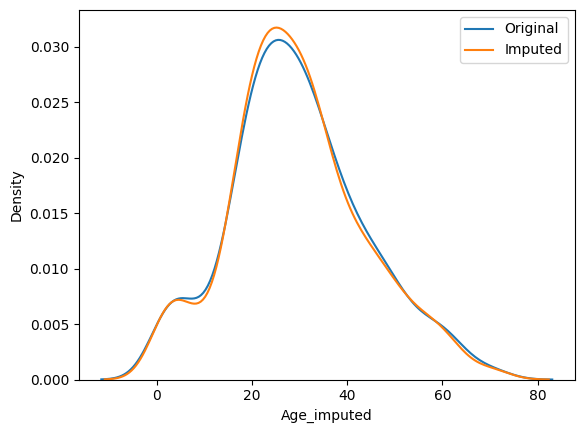

In [ ]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [ ]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  198.23178198375447


In [ ]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,46.480535
Age,71.512440,204.349513,204.349513
Age_imputed,46.480535,204.349513,198.231782


<Axes: >

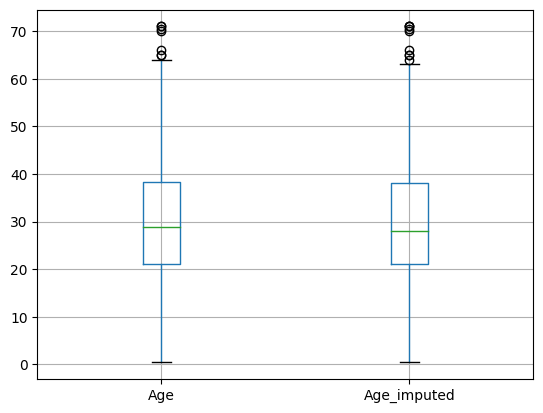

In [ ]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
data = pd.read_csv('/content/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [ ]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


**2.Categorical data**

In [ ]:
data.isnull().mean() * 100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [ ]:
X = data
y = data['SalePrice']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [ ]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1117,NaN,TA,130000,TA,NaN
797,NaN,TA,110000,TA,NaN
1041,NaN,TA,173000,TA,NaN
435,TA,TA,212000,TA,TA
826,NaN,NaN,109500,NaN,NaN


In [ ]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

<ipython-input-388-f5eeca8d3074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipython-input-388-f5eeca8d3074>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
<ipython-input-388-f5eeca8d3074>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [ ]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [ ]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


<ipython-input-391-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-391-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']

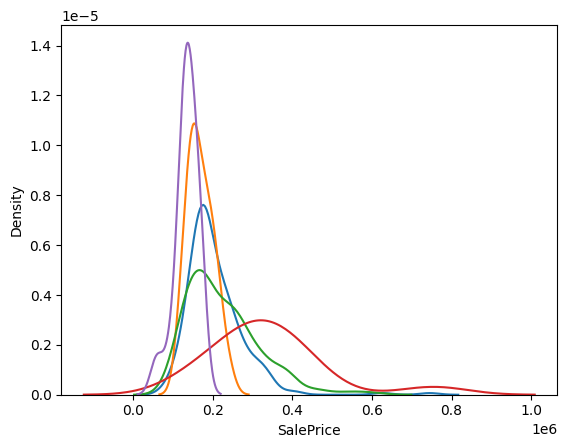

In [ ]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

<ipython-input-392-e022f194d9d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-392-e022f194d9d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firep

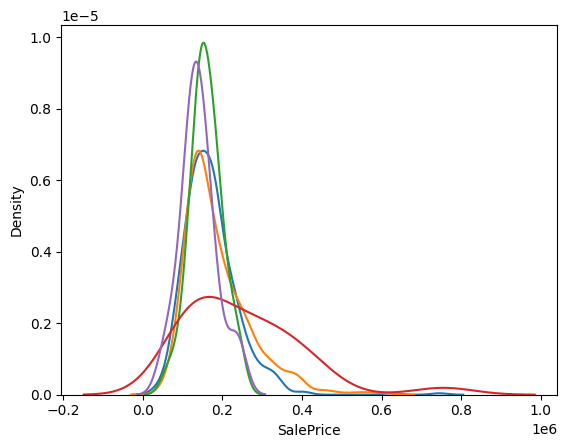

In [ ]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

# **Missing Indicator**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator,SimpleImputer

In [ ]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.head()


,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [ ]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [ ]:
X_train_trf


array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [ ]:
mi = MissingIndicator()

mi.fit(X_train)

MissingIndicator()

In [ ]:
mi.features_

array([0])

In [ ]:
X_train_missing = mi.transform(X_train)
X_test_missing = mi.transform(X_test)

In [ ]:
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
X_train['Age_NA'] = X_train_missing

In [ ]:
X_test

,Age,Fare
707,42.0,26.2875
37,21.0,8.0500
615,24.0,65.0000
169,28.0,56.4958
68,17.0,7.9250
...,...,...
89,24.0,8.0500
80,22.0,9.0000
846,NaN,69.5500
870,26.0,7.8958


In [ ]:
X_test['Age_NA'] = X_test_missing

In [ ]:

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [ ]:
si = SimpleImputer(add_indicator=True)

In [ ]:
X_train = si.fit_transform(X_train)

In [ ]:
X_test = si.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

# **Automatically select value for imputation**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [ ]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [ ]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [ ]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.787852
5,1.0,most_frequent,median,0.787852
6,1.0,constant,mean,0.787852
7,1.0,constant,median,0.787852
8,10,most_frequent,mean,0.787852
9,10,most_frequent,median,0.787852
10,10,constant,mean,0.787852
11,10,constant,median,0.787852
12,100,most_frequent,mean,0.787852
13,100,most_frequent,median,0.787852


# **Multivariate Imputation**

**1.KNN imputer**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('train.csv')[['Age','Pclass','Fare','Survived']]

In [ ]:
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [ ]:
df.isnull().mean() * 100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.head()

,Age,Pclass,Fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458


In [ ]:
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [ ]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7150837988826816

In [ ]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [ ]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978

## **Iterative Imputer or MICE**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [ ]:
df = np.round(pd.read_csv('50_Startups.csv')[['R&D Spend','Administration','Marketing Spend','Profit']]/10000)
np.random.seed(9)
df = df.sample(5)
df

,R&D Spend,Administration,Marketing Spend,Profit
21,8.0,15.0,30.0,11.0
37,4.0,5.0,20.0,9.0
2,15.0,10.0,41.0,19.0
14,12.0,16.0,26.0,13.0
44,2.0,15.0,3.0,7.0


In [ ]:
df = df.iloc[:,0:-1]
df

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,4.0,5.0,20.0
2,15.0,10.0,41.0
14,12.0,16.0,26.0
44,2.0,15.0,3.0


In [ ]:
df.iloc[1,0] = np.NaN
df.iloc[3,1] = np.NaN
df.iloc[-1,-1] = np.NaN

<ipython-input-445-9e8f6afe97a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[1,0] = np.NaN
<ipython-input-445-9e8f6afe97a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[3,1] = np.NaN
<ipython-input-445-9e8f6afe97a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[-1,-1] = np.NaN


In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,NaN,5.0,20.0
2,15.0,10.0,41.0
14,12.0,NaN,26.0
44,2.0,15.0,NaN


In [ ]:
# Step 1 - Impute all missing values with mean of respective col

df0 = pd.DataFrame()

df0['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df0['Administration'] = df['Administration'].fillna(df['Administration'].mean())
df0['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())

In [ ]:
# 0th Iteration
df0

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,9.25,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


In [ ]:
# Remove the col1 imputed value
df1 = df0.copy()

df1.iloc[1,0] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.25,26.00
44,2.0,15.00,29.25


In [ ]:
# Use first 3 rows to build a model and use the last for prediction

X = df1.iloc[[0,2,3,4],1:3]
X

,Administration,Marketing Spend
21,15.00,30.00
2,10.00,41.00
14,11.25,26.00
44,15.00,29.25


In [ ]:
y = df1.iloc[[0,2,3,4],0]
y

21     8.0
2     15.0
14    12.0
44     2.0
Name: R&D Spend, dtype: float64

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[1,1:].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.14158651])

In [ ]:
df1.iloc[1,0] = 23.14

In [ ]:
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


In [ ]:
# Remove the col2 imputed value

df1.iloc[3,1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.0,30.00
37,23.14,5.0,20.00
2,15.00,10.0,41.00
14,12.00,NaN,26.00
44,2.00,15.0,29.25


In [ ]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[[0,1,2,4],[0,2]]
X

,R&D Spend,Marketing Spend
21,8.00,30.00
37,23.14,20.00
2,15.00,41.00
44,2.00,29.25


In [ ]:
y = df1.iloc[[0,1,2,4],1]
y

21    15.0
37     5.0
2     10.0
44    15.0
Name: Administration, dtype: float64

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.06331285])

In [ ]:
df1.iloc[3,1] = 11.06

In [ ]:
df1


,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,29.25


In [ ]:
# Remove the col3 imputed value
df1.iloc[4,-1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.0
37,23.14,5.00,20.0
2,15.00,10.00,41.0
14,12.00,11.06,26.0
44,2.00,15.00,NaN


In [ ]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[0:4,0:2]
X

,R&D Spend,Administration
21,8.00,15.00
37,23.14,5.00
2,15.00,10.00
14,12.00,11.06


In [ ]:
y = df1.iloc[0:4,-1]
y

21    30.0
37    20.0
2     41.0
14    26.0
Name: Marketing Spend, dtype: float64

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[4,0:2].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.56351448])

In [ ]:
df1.iloc[4,-1] = 31.56

In [ ]:
# After 1st Iteration
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,31.56


In [ ]:
# Subtract 0th iteration from 1st iteration

df1 - df0

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,13.89,0.00,0.00
2,0.00,0.00,0.00
14,0.00,-0.19,0.00
44,0.00,0.00,2.31


In [ ]:
df2 = df1.copy()

df2.iloc[1,0] = np.NaN

df2

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.06,26.00
44,2.0,15.00,31.56


In [ ]:
X = df2.iloc[[0,2,3,4],1:3]
y = df2.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[1,1:].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.78627207])

In [ ]:
df2.iloc[1,0] = 23.78

In [ ]:
df2.iloc[3,1] = np.NaN
X = df2.iloc[[0,1,2,4],[0,2]]
y = df2.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[3,[0,2]].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.22020174])

In [ ]:
df2.iloc[3,1] = 11.22

In [ ]:
df2.iloc[4,-1] = np.NaN

X = df2.iloc[0:4,0:2]
y = df2.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[4,0:2].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38.87979054])

In [ ]:
df2.iloc[4,-1] = 31.56

In [ ]:
df2

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.78,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.22,26.00
44,2.00,15.00,31.56


In [ ]:
df2 - df1

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.0
37,0.64,0.00,0.0
2,0.00,0.00,0.0
14,0.00,0.16,0.0
44,0.00,0.00,0.0


In [ ]:
df3 = df2.copy()

df3.iloc[1,0] = np.NaN

df3

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.22,26.00
44,2.0,15.00,31.56


In [ ]:
X = df3.iloc[[0,2,3,4],1:3]
y = df3.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[1,1:].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.57698058])

In [ ]:
df3.iloc[1,0] = 24.57

In [ ]:
df3.iloc[3,1] = np.NaN
X = df3.iloc[[0,1,2,4],[0,2]]
y = df3.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[3,[0,2]].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.37282844])

In [ ]:
df3.iloc[3,1] = 11.37

In [ ]:
df3.iloc[4,-1] = np.NaN

X = df3.iloc[0:4,0:2]
y = df3.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[4,0:2].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.53976417])

In [ ]:
df3.iloc[4,-1] = 45.53

In [ ]:
df2.iloc[3,1] = 11.22

In [ ]:
df3

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,24.57,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.37,26.00
44,2.00,15.00,45.53


In [ ]:
df3 - df2

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,0.79,0.00,0.00
2,0.00,0.00,0.00
14,0.00,0.15,0.00
44,0.00,0.00,13.97
